In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import yfinance as yf

#TA-Lib for indicators
import talib
import pynance as py
import quantstats as qs


## ○ Use additional finance data
## ○ Load and prepare the data.


#### ■ Load your stock price data into a pandas DataFrame. Ensure your data includes columns like Open, High, Low, Close, and Volume.

In [3]:
# 1. Define the list of tickers and the structure to hold the DataFrames
tickers = ['NVDA', 'AAPL', 'AMZN', 'GOOG', 'META', 'MSFT']
file_extension = ".csv"
stock_data = {}

##### loading all tickers on one stock_data dictionary. so can be access stock_data['NVDA']

In [4]:
# 2. Loop through the tickers and load the data
for ticker in tickers:
    # Construct the expected file name (e.g., 'NVDA.csv')
    filename = "../data/" +ticker + file_extension
    
    try:
        # Load the CSV file:
        # - index_col='Date': Assumes your date column is named 'Date'
        # - parse_dates=True: Converts the date column into datetime objects
        df = pd.read_csv(
            filename, 
            index_col='Date', 
            parse_dates=True
        )
        
        # Store the DataFrame in the dictionary
        stock_data[ticker] = df
        
        print(f" Loaded {filename}. Shape: {df.shape}")
        
    except FileNotFoundError:
        print(f" ERROR: File '{filename}' not found. Check your file path.")
    except Exception as e:
        print(f" ERROR processing {filename}: {e}")


# 3. Verification
print("\n--- Summary ---")
print("Successfully loaded DataFrames for:", list(stock_data.keys()))

if 'NVDA' in stock_data:
    print("\nFirst 5 rows of NVDA data:")
    print(stock_data['NVDA'].head())

 Loaded ../data/NVDA.csv. Shape: (3774, 5)
 Loaded ../data/AAPL.csv. Shape: (3774, 5)
 Loaded ../data/AMZN.csv. Shape: (3774, 5)
 Loaded ../data/GOOG.csv. Shape: (3774, 5)
 Loaded ../data/META.csv. Shape: (2923, 5)
 Loaded ../data/MSFT.csv. Shape: (3774, 5)

--- Summary ---
Successfully loaded DataFrames for: ['NVDA', 'AAPL', 'AMZN', 'GOOG', 'META', 'MSFT']

First 5 rows of NVDA data:
               Close      High       Low      Open      Volume
Date                                                          
2009-01-02  0.199652  0.201027  0.184294  0.184982   497124000
2009-01-05  0.203319  0.207904  0.195984  0.197360   705736000
2009-01-06  0.210196  0.216156  0.204695  0.209279   657904000
2009-01-07  0.197589  0.205382  0.190483  0.205382   870096000
2009-01-08  0.192546  0.195067  0.180626  0.195067  1014496000


## ○ Apply Analysis Indicators with TA-Lib
#### ■ You can use TA-Lib to calculate various technical indicators such as moving averages, RSI (Relative Strength Index), and MACD (Moving Average Convergence Divergence
#### Calculated for each ticker

In [5]:


# Define common parameters for the indicators
SMA_SHORT = 20
SMA_LONG = 50
EMA_PERIOD = 20
RSI_PERIOD = 14
FAST_PERIOD = 12
SLOW_PERIOD = 26
SIGNAL_PERIOD = 9

for ticker, df in stock_data.items():
    
    # Check for the essential 'Close' column
    if 'Close' not in df.columns:
        print(f"Skipping {ticker}: 'Close' column not found. Cannot calculate indicators.")
        continue

    # Convert the 'Close' series to a NumPy array for TA-Lib
    close_prices = df['Close'].values

    # --- Moving Averages ---
    
    # 1. Simple Moving Average (20-day)
    df[f'{ticker}_SMA_{SMA_SHORT}'] = talib.SMA(close_prices, timeperiod=SMA_SHORT)
    
    # 2. Simple Moving Average (50-day)
    df[f'{ticker}_SMA_{SMA_LONG}'] = talib.SMA(close_prices, timeperiod=SMA_LONG)
    
    # 3. Exponential Moving Average (20-day)
    df[f'{ticker}_EMA_{EMA_PERIOD}'] = talib.EMA(close_prices, timeperiod=EMA_PERIOD)

    # --- Momentum Indicators (Recalculating/Confirming) ---
    
    # 4. RSI (14-day)
    df[f'{ticker}_RSI_{RSI_PERIOD}'] = talib.RSI(close_prices, timeperiod=RSI_PERIOD)
    
    # 5. MACD (and its components)
    macd, macd_signal, macd_hist = talib.MACD(
        close_prices, 
        fastperiod=FAST_PERIOD, 
        slowperiod=SLOW_PERIOD, 
        signalperiod=SIGNAL_PERIOD
    )
    
    # Add MACD components as separate columns
    df[f'{ticker}_MACD'] = macd
    df[f'{ticker}_MACD_Signal'] = macd_signal
    df[f'{ticker}_MACD_Hist'] = macd_hist
    
    print(f"✅ Calculated all 5 indicators for {ticker}.")

print("\nAll stock DataFrames in 'stock_data' have been updated with new technical indicators.")

✅ Calculated all 5 indicators for NVDA.
✅ Calculated all 5 indicators for AAPL.
✅ Calculated all 5 indicators for AMZN.
✅ Calculated all 5 indicators for GOOG.
✅ Calculated all 5 indicators for META.
✅ Calculated all 5 indicators for MSFT.

All stock DataFrames in 'stock_data' have been updated with new technical indicators.


In [6]:
# Check the columns for Google (GOOG)
print("\nColumns of GOOG DataFrame after calculation:")
print(stock_data['GOOG'].columns)

# Check the last few rows to see non-NaN indicator values
print("\nLast 10 rows of GOOG data with new indicators:")
print(stock_data['GOOG'].tail(10)[['Close', 'GOOG_SMA_20', 'GOOG_RSI_14', 'GOOG_MACD_Hist']])


Columns of GOOG DataFrame after calculation:
Index(['Close', 'High', 'Low', 'Open', 'Volume', 'GOOG_SMA_20', 'GOOG_SMA_50',
       'GOOG_EMA_20', 'GOOG_RSI_14', 'GOOG_MACD', 'GOOG_MACD_Signal',
       'GOOG_MACD_Hist'],
      dtype='object')

Last 10 rows of GOOG data with new indicators:
                 Close  GOOG_SMA_20  GOOG_RSI_14  GOOG_MACD_Hist
Date                                                            
2023-12-15  132.930344   134.624729    48.205282       -0.253484
2023-12-18  136.257538   134.637142    55.322365       -0.012916
2023-12-19  137.161362   134.646081    57.048922        0.195828
2023-12-20  138.710785   134.697729    59.909189        0.414435
2023-12-21  140.836227   134.786124    63.499976        0.663581
2023-12-22  141.750000   135.009596    64.953309        0.839969
2023-12-26  141.849304   135.246477    65.115870        0.907615
2023-12-27  140.478683   135.386520    60.916026        0.807682
2023-12-28  140.319748   135.628861    60.429303        0.6

In [7]:
def generate_advanced_signals(df, ticker):
    """
    Generates comprehensive trading signals based on Price Action, Trend, and Momentum.
    """
    # Define dynamic column names
    close = df['Close']
    sma_20 = df[f'{ticker}_SMA_20']
    sma_50 = df[f'{ticker}_SMA_50']
    ema_20 = df[f'{ticker}_EMA_20']
    rsi_14 = df[f'{ticker}_RSI_14']
    macd_hist = df[f'{ticker}_MACD_Hist']
    
    # Initialize new signal columns
    df['Price_Action_Signal'] = 0
    df['Trend_Signal'] = 0
    df['Short_Term_Strength'] = 0
    df['Consensus_Signal'] = 0
    
    # --- 1. Price Action Signal: Relation to EMA_20 (Short-Term Bias) ---
    # EMA_20 acts as a dynamic support/resistance line.
    # Buy (1): Close price is above the EMA_20.
    # Sell (-1): Close price is below the EMA_20.
    df.loc[close > ema_20, 'Price_Action_Signal'] = 1
    df.loc[close < ema_20, 'Price_Action_Signal'] = -1
    
    # --- 2. Trend Signal: SMA Crossover (Medium-Term Direction) ---
    # Buy (1): SMA_20 (short-term) is above SMA_50 (long-term). (Golden Cross potential)
    # Sell (-1): SMA_20 (short-term) is below SMA_50 (long-term). (Death Cross potential)
    df.loc[sma_20 > sma_50, 'Trend_Signal'] = 1
    df.loc[sma_20 < sma_50, 'Trend_Signal'] = -1
    
    # --- 3. Short-Term Strength: RSI & MACD (Momentum and Overbought/Oversold) ---
    # We combine RSI level and MACD momentum for short-term strength:
    
    # Strong Buy (1): RSI is in bullish territory (e.g., > 50) AND MACD Histogram > 0.
    df.loc[(rsi_14 > 50) & (macd_hist > 0), 'Short_Term_Strength'] = 1
    
    # Strong Sell (-1): RSI is in bearish territory (e.g., < 50) AND MACD Histogram < 0.
    df.loc[(rsi_14 < 50) & (macd_hist < 0), 'Short_Term_Strength'] = -1

    # --- 4. Consensus Signal (Sum of all three indicators) ---
    # The final signal is the sum of the individual signals.
    df['Consensus_Signal'] = df['Price_Action_Signal'] + df['Trend_Signal'] + df['Short_Term_Strength']
    
    return df

# --- Apply the function to all stocks ---
# Make sure your 'stock_data' dictionary is defined and contains the calculated indicators
for ticker, df in stock_data.items():
    # Use .copy() to avoid SettingWithCopyWarning if modifying in place
    stock_data[ticker] = generate_advanced_signals(df.copy(), ticker)

print("Advanced signals (Price Action, Trend, Short-Term Strength) calculated for all stocks.")

Advanced signals (Price Action, Trend, Short-Term Strength) calculated for all stocks.


In [8]:
def prepare_technical_summary(df, ticker):
    """
    Generates a textual summary of trading signals and technical state.
    """
    # 1. Get the most recent data point
    latest = df.iloc[-1]
    
    # Check for NaN values (occurs at the start of the data)
    if latest.isnull().any():
        return f"Insufficient data ({len(df)} rows) to generate a complete technical summary for {ticker}."

    # 2. Extract Key Signals and Values
    close = latest['Close']
    sma_20 = latest[f'{ticker}_SMA_20']
    sma_50 = latest[f'{ticker}_SMA_50']
    ema_20 = latest[f'{ticker}_EMA_20']
    rsi_14 = latest[f'{ticker}_RSI_14']
    macd_hist = latest[f'{ticker}_MACD_Hist']
    
    pa_signal = latest['Price_Action_Signal']
    trend_signal = latest['Trend_Signal']
    strength_signal = latest['Short_Term_Strength']
    consensus = latest['Consensus_Signal']
    
    # 3. Build Summary Text
    
    # --- Price Action Summary (Close vs EMA_20) ---
    pa_desc = f"Price Action: Close (${close:.2f}) is "
    if pa_signal == 1:
        pa_desc += f"**ABOVE** its EMA_20 (${ema_20:.2f}), suggesting immediate upward pressure."
    elif pa_signal == -1:
        pa_desc += f"**BELOW** its EMA_20 (${ema_20:.2f}), suggesting immediate downward pressure."
    else:
        pa_desc += f"**NEAR** its EMA_20 (${ema_20:.2f}), indicating short-term indecision."

    # --- Trend Summary (SMA_20 vs SMA_50) ---
    trend_desc = f"Trend: SMA_20 (${sma_20:.2f}) is "
    if trend_signal == 1:
        trend_desc += f"**ABOVE** SMA_50 (${sma_50:.2f}), confirming a bullish medium-term trend (Golden Cross bias)."
    elif trend_signal == -1:
        trend_desc += f"**BELOW** SMA_50 (${sma_50:.2f}), confirming a bearish medium-term trend (Death Cross bias)."
    else:
        trend_desc += "crossing or flat, indicating a neutral trend."

    # --- Short-Term Strength (RSI & MACD) ---
    strength_desc = f"Short-term Strength: RSI_14 is at **{rsi_14:.2f}** and MACD Hist is **{macd_hist:.3f}**."
    if strength_signal == 1:
        strength_desc += " **Strong Bullish Momentum** (RSI > 50 and MACD Hist > 0)."
    elif strength_signal == -1:
        strength_desc += " **Strong Bearish Momentum** (RSI < 50 and MACD Hist < 0)."
    elif rsi_14 > 70:
        strength_desc += " **Overbought** (RSI > 70), price may pull back."
    elif rsi_14 < 30:
        strength_desc += " **Oversold** (RSI < 30), price may rebound."

    # --- Final Consensus ---
    if consensus >= 2:
        consensus_desc = f"**Final Consensus: STRONG BUY (+{consensus})** - All major indicators align bullishly."
    elif consensus <= -2:
        consensus_desc = f"**Final Consensus: STRONG SELL ({consensus})** - All major indicators align bearishly."
    elif consensus == 1:
        consensus_desc = f"**Final Consensus: BUY (+{consensus})** - Bullish bias with some conflicting signals."
    elif consensus == -1:
        consensus_desc = f"**Final Consensus: SELL ({consensus})** - Bearish bias with some conflicting signals."
    else: # consensus == 0
        consensus_desc = "**Final Consensus: HOLD (0)** - Mixed signals, wait for a clearer direction."

    
    full_summary = f"## 📈 Technical Summary for {ticker}\n\n"
    full_summary += f"* {pa_desc}\n"
    full_summary += f"* {trend_desc}\n"
    full_summary += f"* {strength_desc}\n\n"
    full_summary += consensus_desc

    return full_summary

In [35]:
# --- Example Usage (Assuming 'stock_data' is populated) ---
# To generate the summary for each ticker:
#for ticker, df in stock_data.items():
    #if ticker in stock_data:
        #nvda_summary = prepare_technical_summary(stock_data[ticker], ticker)
        #print(nvda_summary)
    #else:
        #print(f"Cannot run summary: '{ticker}' data not found in 'stock_data' dictionary.")

## Below report generated with above code and i copy the text and iserted on Markdonw

## 📈 Technical Summary for NVDA

* Price Action: Close ($49.50) is **ABOVE** its EMA_20 ($48.49), suggesting immediate upward pressure.
* Trend: SMA_20 ($48.05) is **ABOVE** SMA_50 ($46.66), confirming a bullish medium-term trend (Golden Cross bias).
* Short-term Strength: RSI_14 is at **58.31** and MACD Hist is **0.062**. **Strong Bullish Momentum** (RSI > 50 and MACD Hist > 0).

**Final Consensus: STRONG BUY (+3.0)** - All major indicators align bullishly.
## 📈 Technical Summary for AAPL

* Price Action: Close ($190.73) is **BELOW** its EMA_20 ($191.43), suggesting immediate downward pressure.
* Trend: SMA_20 ($192.49) is **ABOVE** SMA_50 ($184.81), confirming a bullish medium-term trend (Golden Cross bias).
* Short-term Strength: RSI_14 is at **51.12** and MACD Hist is **-0.865**.

**Final Consensus: HOLD (0)** - Mixed signals, wait for a clearer direction.
## 📈 Technical Summary for AMZN

* Price Action: Close ($151.94) is **ABOVE** its EMA_20 ($150.21), suggesting immediate upward pressure.
* Trend: SMA_20 ($149.82) is **ABOVE** SMA_50 ($143.05), confirming a bullish medium-term trend (Golden Cross bias).
* Short-term Strength: RSI_14 is at **59.01** and MACD Hist is **-0.141**.

**Final Consensus: STRONG BUY (+2.0)** - All major indicators align bullishly.
## 📈 Technical Summary for GOOG

* Price Action: Close ($139.97) is **ABOVE** its EMA_20 ($137.41), suggesting immediate upward pressure.
* Trend: SMA_20 ($135.98) is **ABOVE** SMA_50 ($134.06), confirming a bullish medium-term trend (Golden Cross bias).
* Short-term Strength: RSI_14 is at **59.31** and MACD Hist is **0.537**. **Strong Bullish Momentum** (RSI > 50 and MACD Hist > 0).

**Final Consensus: STRONG BUY (+3.0)** - All major indicators align bullishly.
## 📈 Technical Summary for META

* Price Action: Close ($351.79) is **ABOVE** its EMA_20 ($341.66), suggesting immediate upward pressure.
* Trend: SMA_20 ($336.87) is **ABOVE** SMA_50 ($326.26), confirming a bullish medium-term trend (Golden Cross bias).
* Short-term Strength: RSI_14 is at **64.30** and MACD Hist is **1.500**. **Strong Bullish Momentum** (RSI > 50 and MACD Hist > 0).

**Final Consensus: STRONG BUY (+3.0)** - All major indicators align bullishly.
## 📈 Technical Summary for MSFT

* Price Action: Close ($371.21) is **ABOVE** its EMA_20 ($367.79), suggesting immediate upward pressure.
* Trend: SMA_20 ($367.79) is **ABOVE** SMA_50 ($358.64), confirming a bullish medium-term trend (Golden Cross bias).
* Short-term Strength: RSI_14 is at **57.95** and MACD Hist is **-0.496**.

**Final Consensus: STRONG BUY (+2.0)** - All major indicators align bullishly.

## ○ Use PyNance for Financial Metrics
## ○ Visualize the Data
#### ■ Create visualizations to better understand the data and the impact of different indicators on the stock price.

In [9]:
def plot_technical_analysis(df, ticker):
    """
    Generates a two-panel chart showing Close Price, MAs, and RSI for a given ticker.
    Displays the chart directly in the notebook.
    """
    
    # Drop initial NaN rows required for indicator look-back period
    df_plot = df.dropna().copy()
    
    if df_plot.empty:
        print(f"Skipping {ticker}: Insufficient data after dropping NaNs for plotting indicators.")
        return

    # --- Create the Visualization ---
    fig, (ax1, ax2) = plt.subplots(
        2, 1, 
        figsize=(14, 8), 
        sharex=True, # Share the X-axis for easy comparison
        gridspec_kw={'height_ratios': [3, 1]}
    )

    # --- Subplot 1: Price and Moving Averages ---
    ax1.set_title(f'{ticker} Price Action, Trend, and Consensus Signal', fontsize=16)
    ax1.plot(df_plot.index, df_plot['Close'], label='Close Price', color='blue', linewidth=2)
    ax1.plot(df_plot.index, df_plot[f'{ticker}_SMA_20'], label='SMA 20', color='orange', linestyle='--')
    ax1.plot(df_plot.index, df_plot[f'{ticker}_SMA_50'], label='SMA 50', color='red', linestyle='--')
    ax1.set_ylabel('Price ($)', fontsize=12)
    ax1.grid(True, linestyle=':', alpha=0.6)
    ax1.legend(loc='upper left', fontsize=10)

    # Highlight Buy/Sell Signals based on Consensus_Signal
    buy_signals = df_plot[df_plot['Consensus_Signal'] >= 2]
    sell_signals = df_plot[df_plot['Consensus_Signal'] <= -2]
    
    ax1.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', s=100, label='Strong Buy Signal')
    ax1.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', s=100, label='Strong Sell Signal')
    
    # --- Subplot 2: RSI (Relative Strength Index) ---
    rsi_col = f'{ticker}_RSI_14'
    ax2.plot(df_plot.index, df_plot[rsi_col], label=rsi_col, color='purple', linewidth=1.5)
    ax2.axhline(70, color='red', linestyle='-', linewidth=1)
    ax2.axhline(30, color='green', linestyle='-', linewidth=1)
    ax2.fill_between(df_plot.index, 30, 70, color='gray', alpha=0.1)
    ax2.set_ylabel('RSI (0-100)', fontsize=12)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.set_ylim(0, 100)
    ax2.grid(True, linestyle=':', alpha=0.6)
    ax2.legend(loc='upper left', fontsize=10)

    plt.tight_layout()
    
    # 🌟 KEY CHANGE: Display the plot instead of saving it
    plt.show() 
    
    # We no longer need plt.close(fig) as the notebook handles the display

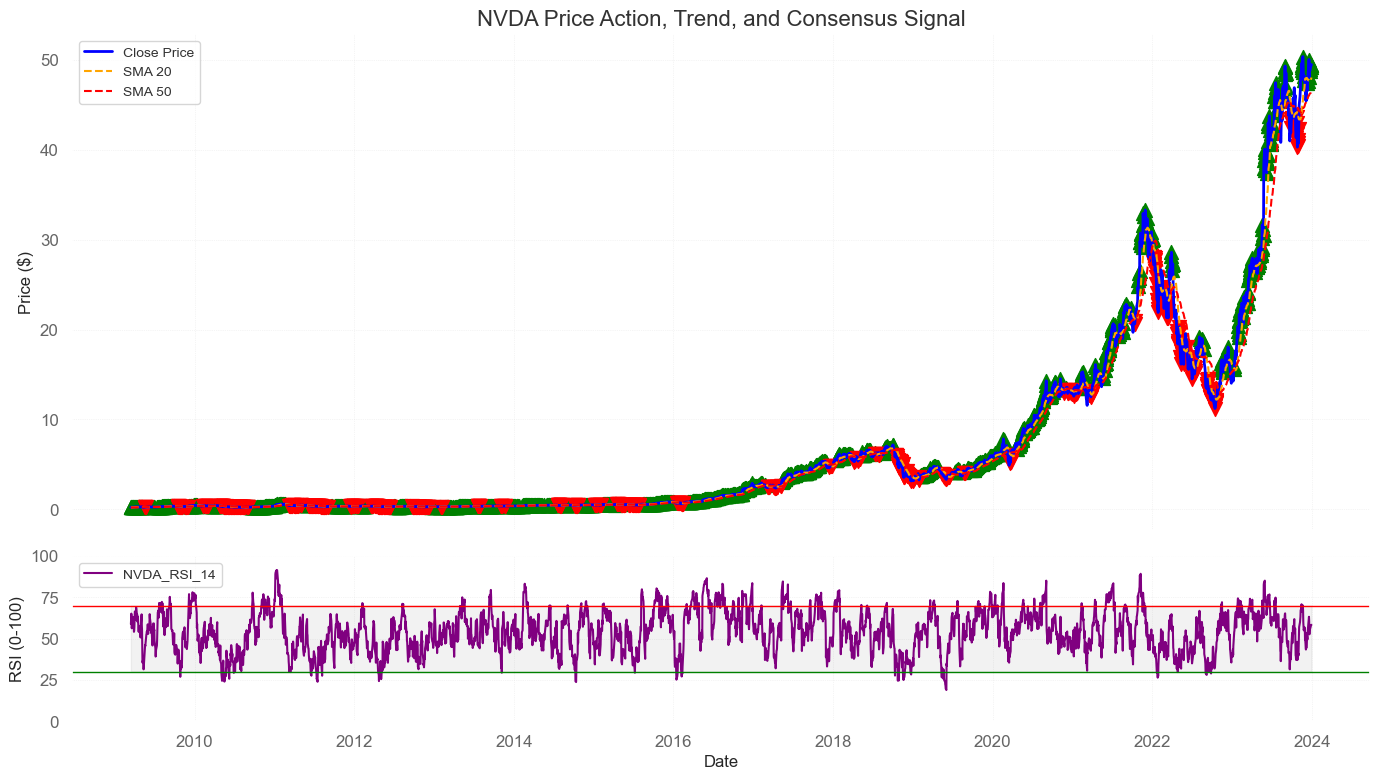

--- Chart for NVDA displayed ---


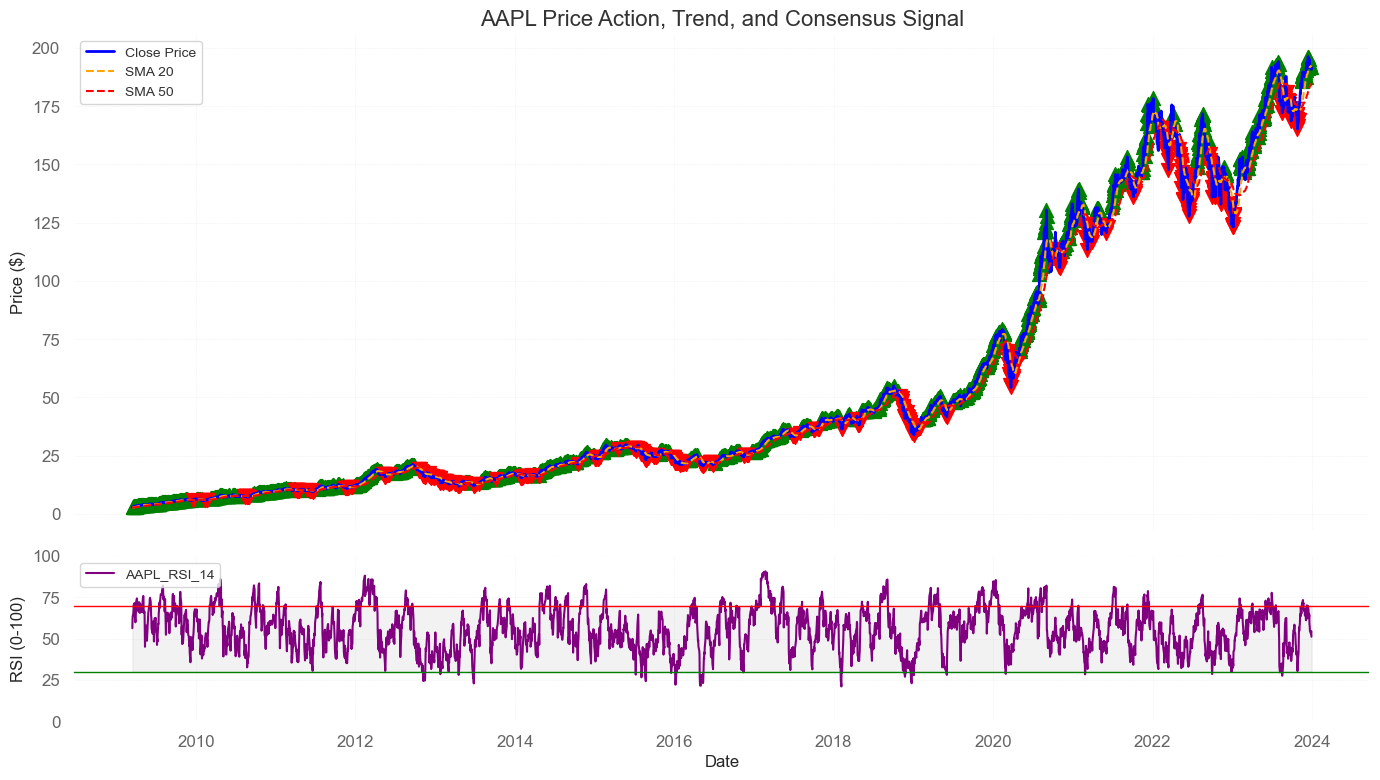

--- Chart for AAPL displayed ---


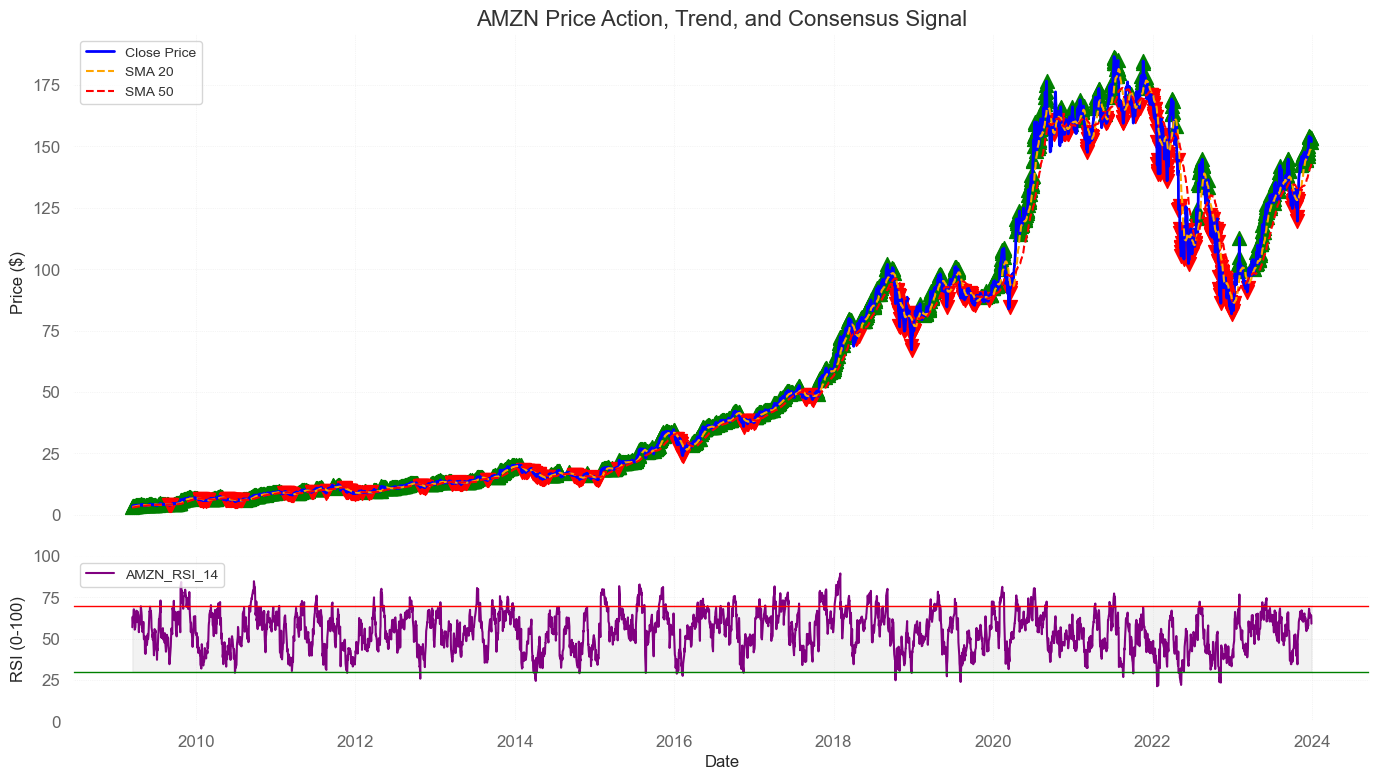

--- Chart for AMZN displayed ---


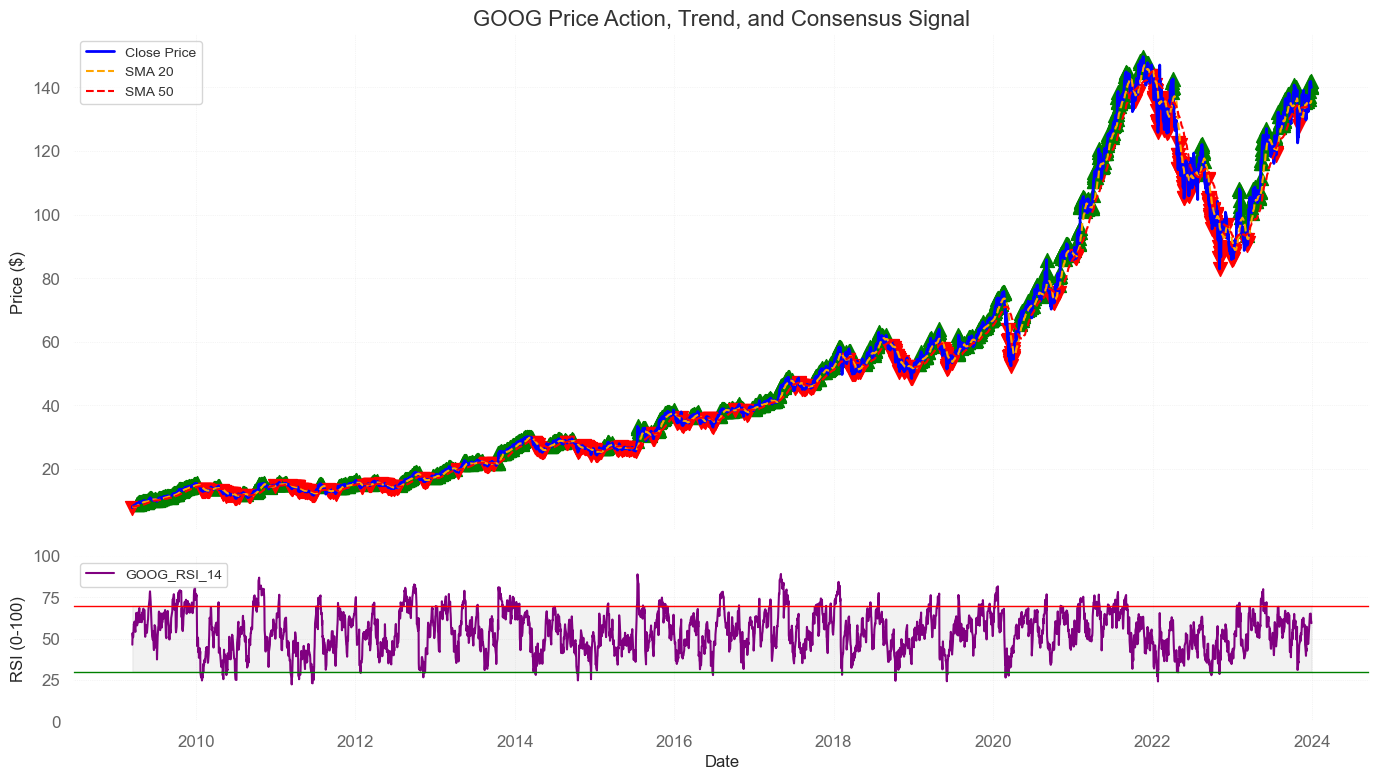

--- Chart for GOOG displayed ---


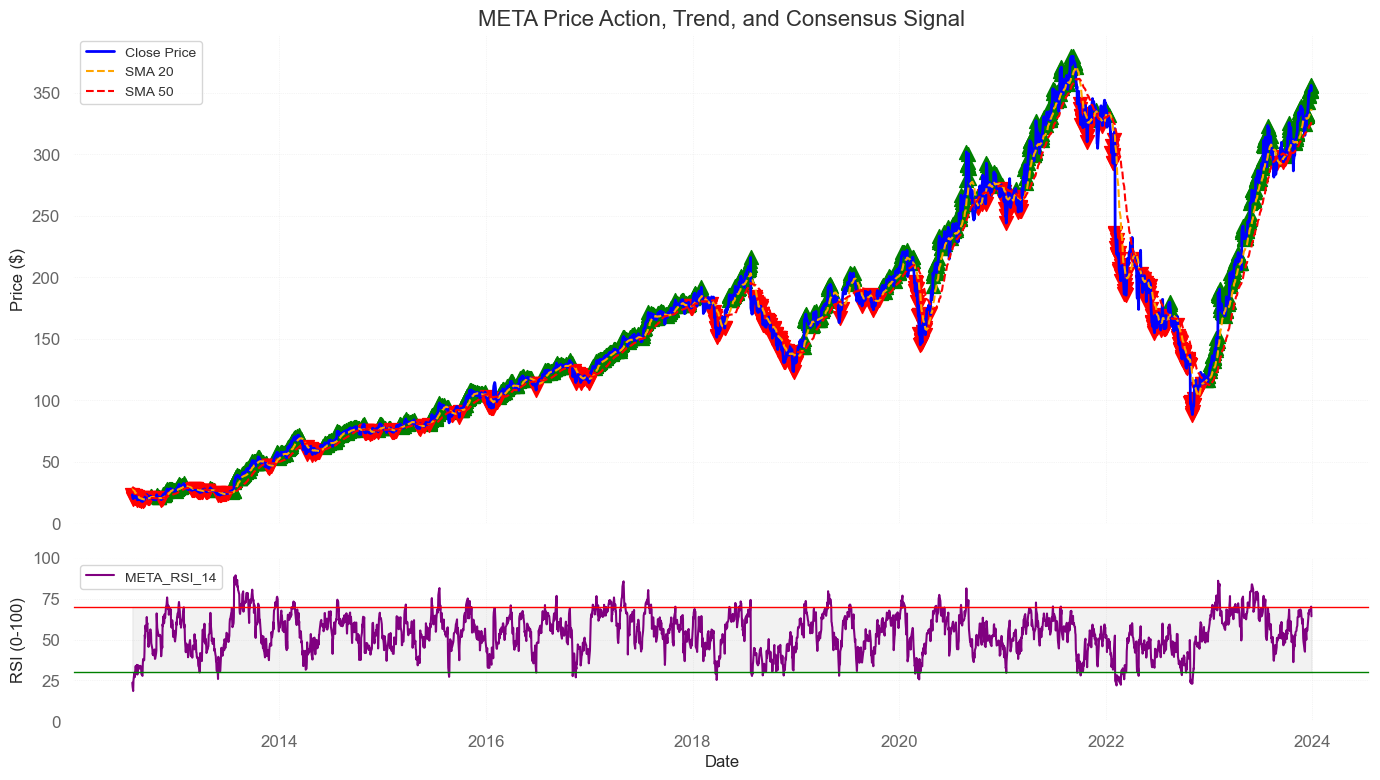

--- Chart for META displayed ---


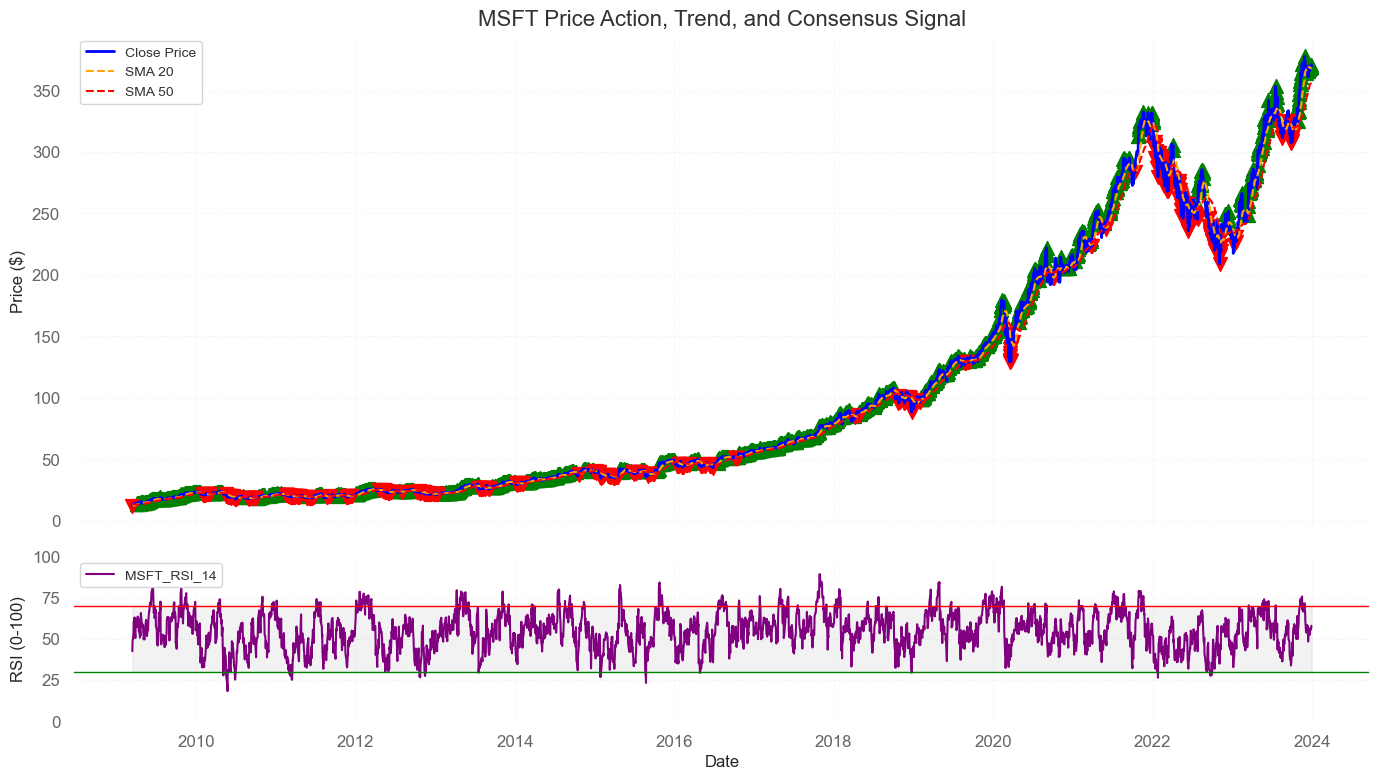

--- Chart for MSFT displayed ---

All technical charts have been displayed in the notebook.


In [10]:
# --- Execution ---
# Loop through all tickers in your stock_data dictionary
for ticker, df in stock_data.items():
    plot_technical_analysis(df, ticker)
    print(f"--- Chart for {ticker} displayed ---")

print("\nAll technical charts have been displayed in the notebook.")